In [1]:
!pip install arch

     |████████████████████████████████| 798kB 4.4MB/s 


In [2]:

import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

start = datetime(2018,1,10)
end = datetime(2020,12,7)

In [4]:
df = pd.read_csv('/content/volatility.csv', parse_dates=['date'])

In [5]:
df = df.sort_values(by='date')

In [47]:
df.head(50)

Unnamed: 0    actual     model  predicted
date                                                 
2018-01-10          36  0.059142  0.175513        NaN
2018-01-11          59  0.063908  0.196979        NaN
2018-02-10          37  0.067865  0.204864        NaN
2018-02-12          79  0.060884  0.164157        NaN
2018-03-09          16  0.000000  0.279753        NaN
2018-03-10          38  0.061791  0.200368        NaN
2018-03-12          80  0.061149  0.162259        NaN
2018-04-09          17  0.000000  0.272656        NaN
2018-04-10          39  0.060240  0.197814        NaN
2018-04-11          60  0.065208  0.196121        NaN
2018-04-12          81  0.061198  0.160247        NaN
2018-05-08           0  0.000000  0.245465        NaN
2018-05-09          18  0.000000  0.263803        NaN
2018-05-11          61  0.068430  0.203122        NaN
2018-05-12          82  0.060916  0.157724        NaN
2018-06-08           1  0.000000  0.239525        NaN
2018-06-09          19  0.000000  0.255386        NaN
2018-06-11          62  0.068358  0.197902        NaN
2018-06-12          83  0.061226  0.159621        NaN
2018-07-08           2  0.000000  0.232408        NaN
2018-07-10          40  0.058741  0.193996        NaN
2018-07-11          63  0.068344  0.192976        NaN
2018-08-08           3  0.000000  0.229499        NaN
2018-08-10          41  0.054615  0.198578        NaN
2018-08-11          64  0.068587  0.189481        NaN
2018-08-13           6  0.000000  0.342303        NaN
2018-08-14           7  0.000000  0.331616        NaN
2018-08-16           8  0.000000  0.333043        NaN
2018-08-19           9  0.000000  0.324781        NaN
2018-08-20          10  0.000000  0.318573        NaN
2018-08-26          11  0.000000  0.322196        NaN
2018-08-27          12  0.000000  0.312809        NaN
2018-08-28          13  0.000000  0.305568        NaN
2018-08-29          14  0.000000  0.296319        NaN
2018-08-30          15  0.000000  0.289050        NaN
2018-09-08           4  0.000000  0.228595        NaN
2018-09-09          20  0.000000  0.248919        NaN
2018-09-10          42  0.054694  0.196780        NaN
2018-09-12          84  0.061289  0.159162        NaN
2018-09-13          24  0.000000  0.230325        NaN
2018-09-16          25  0.000000  0.223683        NaN
2018-09-17          26  0.000000  0.217345        NaN
2018-09-18          27  0.000000  0.211399        NaN
2018-09-19          28  0.000000  0.206612        NaN
2018-09-20          29  0.103951  0.202566        NaN
2018-09-23          30  0.103978  0.197430        NaN
2018-09-24          31  0.103653  0.193485        NaN
2018-09-25          32  0.103701  0.189054        NaN
2018-09-26          33  0.103085  0.184634        NaN
2018-09-27          34  0.102041  0.180444        NaN

In [7]:
df.index = pd.to_datetime(df['date'])

In [8]:
df.shape

(437, 4)

In [9]:
df = df.set_index('date')


In [10]:
volatility = df['actual']*100

Text(0.5, 1.0, 'volatility')

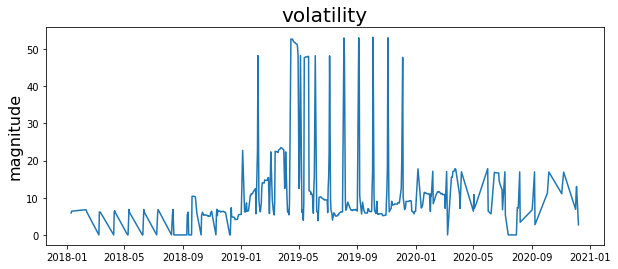

In [11]:
plt.figure(figsize=(10,4))
plt.plot(volatility)
plt.ylabel('magnitude', fontsize=16)
plt.title('volatility', fontsize=20)

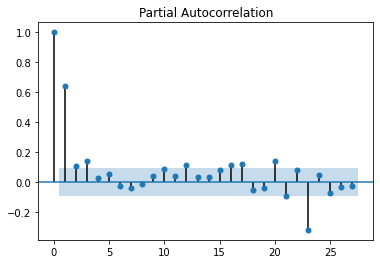

In [12]:

plot_pacf(volatility**2)
plt.show()

In [13]:
model = arch_model(volatility, p=4, q=4)

In [14]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 1619.590718314276
Iteration:      2,   Func. Count:     26,   Neg. LLF: 1598.1792537413278
Iteration:      3,   Func. Count:     39,   Neg. LLF: 1592.6161488648268
Iteration:      4,   Func. Count:     51,   Neg. LLF: 1567.8675625564927
Iteration:      5,   Func. Count:     66,   Neg. LLF: 1567.1607972160332
Iteration:      6,   Func. Count:     78,   Neg. LLF: 1557.382104753564
Iteration:      7,   Func. Count:     92,   Neg. LLF: 1556.9078064266089
Iteration:      8,   Func. Count:    105,   Neg. LLF: 1552.5030949114455
Iteration:      9,   Func. Count:    117,   Neg. LLF: 1551.0813325486351
Iteration:     10,   Func. Count:    130,   Neg. LLF: 1550.8661729041069
Iteration:     11,   Func. Count:    143,   Neg. LLF: 1550.5899786644693
Iteration:     12,   Func. Count:    155,   Neg. LLF: 1550.5689582724617
Iteration:     13,   Func. Count:    167,   Neg. LLF: 1550.5402900302863
Iteration:     14,   Func. Count:    182,   Neg. LLF:

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 actual   R-squared:                      -0.097
Mean Model:             Constant Mean   Adj. R-squared:                 -0.097
Vol Model:                      GARCH   Log-Likelihood:               -1550.54
Distribution:                  Normal   AIC:                           3121.09
Method:            Maximum Likelihood   BIC:                           3161.89
                                        No. Observations:                  437
Date:                Sun, Dec 20 2020   Df Residuals:                      427
Time:                        02:34:20   Df Model:                           10
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.6577      5.907      1.296      0.195 [ -3.920, 19.236]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.3589     57.530  5.839e-02      0.953 [-1.094e+02,1.161e+02]
alpha[1]       0.3722      1.054      0.353      0.724      [ -1.693,  2.437]
alpha[2]   3.9816e-08      0.817  4.873e-08      1.000      [ -1.602,  1.602]
alpha[3]   5.0420e-08      0.868  5.809e-08      1.000      [ -1.701,  1.701]
alpha[4]   1.1285e-08      0.270  4.176e-08      1.000      [ -0.530,  0.530]
beta[1]    2.1194e-08      1.789  1.184e-08      1.000      [ -3.507,  3.507]
beta[2]    3.9374e-08      1.379  2.855e-08      1.000      [ -2.703,  2.703]
beta[3]        0.0401  7.051e-02      0.568      0.570   [-9.813e-02,  0.178]
beta[4]        0.5877      1.410      0.417      0.677      [ -2.176,  3.351]
=============================================================================

Covariance estimator: robust
"""

In [16]:
rolling_predictions = []
test_size = 400

for i in range(test_size):
    train = volatility[:-(test_size-i)]
    model = arch_model(train, p=4, q=4)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Converge

In [17]:
rolling_predictions = pd.Series(rolling_predictions, index=volatility.index[-400:])

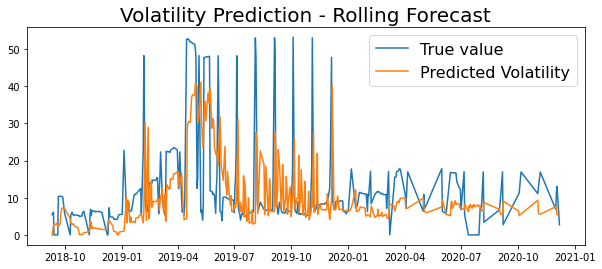

In [38]:
plt.figure(figsize=(10,4))
true, = plt.plot(volatility[-400:])
preds, = plt.plot(rolling_predictions)

plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True value', 'Predicted Volatility'], fontsize=16)

In [39]:

train = volatility
model = arch_model(train, p=4, q=4)
model_fit = model.fit(disp='off')

In [40]:
pred = model_fit.forecast(horizon=10)
future_dates = [volatility.index[-1] + timedelta(days=i) for i in range(1,11)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 10 Days')

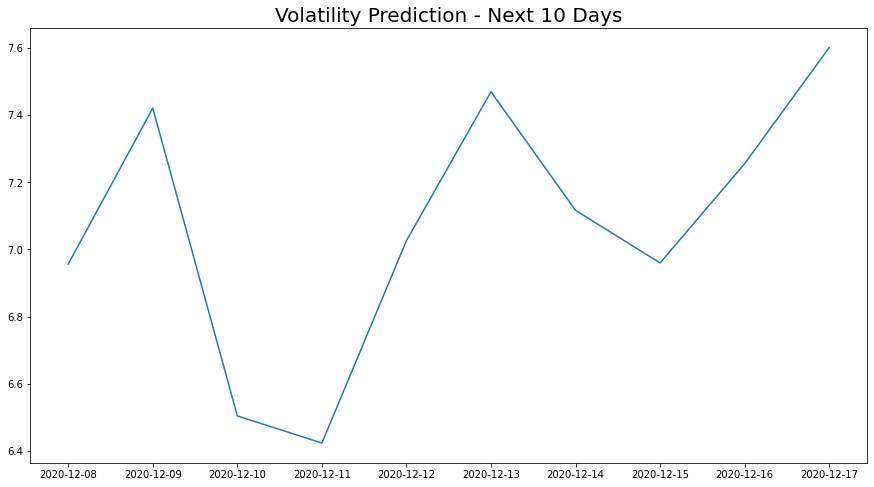

In [41]:
plt.figure(figsize=(15,8))
plt.plot(pred)
plt.title('Volatility Prediction - Next 10 Days', fontsize=20)

In [42]:
pred

2020-12-08    6.956466
2020-12-09    7.420694
2020-12-10    6.504359
2020-12-11    6.423562
2020-12-12    7.025990
2020-12-13    7.469384
2020-12-14    7.116426
2020-12-15    6.959736
2020-12-16    7.255071
2020-12-17    7.600635
dtype: float64

In [43]:
df['predicted']=pred

In [44]:
df['predicted']=df['predicted']

In [46]:
df.head(50)

Unnamed: 0    actual     model  predicted
date                                                 
2018-01-10          36  0.059142  0.175513        NaN
2018-01-11          59  0.063908  0.196979        NaN
2018-02-10          37  0.067865  0.204864        NaN
2018-02-12          79  0.060884  0.164157        NaN
2018-03-09          16  0.000000  0.279753        NaN
2018-03-10          38  0.061791  0.200368        NaN
2018-03-12          80  0.061149  0.162259        NaN
2018-04-09          17  0.000000  0.272656        NaN
2018-04-10          39  0.060240  0.197814        NaN
2018-04-11          60  0.065208  0.196121        NaN
2018-04-12          81  0.061198  0.160247        NaN
2018-05-08           0  0.000000  0.245465        NaN
2018-05-09          18  0.000000  0.263803        NaN
2018-05-11          61  0.068430  0.203122        NaN
2018-05-12          82  0.060916  0.157724        NaN
2018-06-08           1  0.000000  0.239525        NaN
2018-06-09          19  0.000000  0.255386        NaN
2018-06-11          62  0.068358  0.197902        NaN
2018-06-12          83  0.061226  0.159621        NaN
2018-07-08           2  0.000000  0.232408        NaN
2018-07-10          40  0.058741  0.193996        NaN
2018-07-11          63  0.068344  0.192976        NaN
2018-08-08           3  0.000000  0.229499        NaN
2018-08-10          41  0.054615  0.198578        NaN
2018-08-11          64  0.068587  0.189481        NaN
2018-08-13           6  0.000000  0.342303        NaN
2018-08-14           7  0.000000  0.331616        NaN
2018-08-16           8  0.000000  0.333043        NaN
2018-08-19           9  0.000000  0.324781        NaN
2018-08-20          10  0.000000  0.318573        NaN
2018-08-26          11  0.000000  0.322196        NaN
2018-08-27          12  0.000000  0.312809        NaN
2018-08-28          13  0.000000  0.305568        NaN
2018-08-29          14  0.000000  0.296319        NaN
2018-08-30          15  0.000000  0.289050        NaN
2018-09-08           4  0.000000  0.228595        NaN
2018-09-09          20  0.000000  0.248919        NaN
2018-09-10          42  0.054694  0.196780        NaN
2018-09-12          84  0.061289  0.159162        NaN
2018-09-13          24  0.000000  0.230325        NaN
2018-09-16          25  0.000000  0.223683        NaN
2018-09-17          26  0.000000  0.217345        NaN
2018-09-18          27  0.000000  0.211399        NaN
2018-09-19          28  0.000000  0.206612        NaN
2018-09-20          29  0.103951  0.202566        NaN
2018-09-23          30  0.103978  0.197430        NaN
2018-09-24          31  0.103653  0.193485        NaN
2018-09-25          32  0.103701  0.189054        NaN
2018-09-26          33  0.103085  0.184634        NaN
2018-09-27          34  0.102041  0.180444        NaN

In [29]:
import math


In [30]:
from sklearn.metrics import mean_squared_error

rmse =mean_squared_error(df.actual, df.predicted,squared=False)

print(rmse)


0.1623706039729206


In [34]:
from sklearn.metrics import r2_score

print("R2 score : %.2f" % r2_score(df.predicted,df.actual))

R2 score : 0.00
